# International COVID-19 Deaths

Data from:
https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/260bbbde-2316-40eb-aec3-7cd7bfc2f590


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import curve_fit
import pandas as pd
import io
import requests


### Pull data from opendata.ecdc.europa.eu (European Center for Disease Prevention and Control)

In [2]:

url="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

### Plot data

/Users/ph290/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(-40, 80)

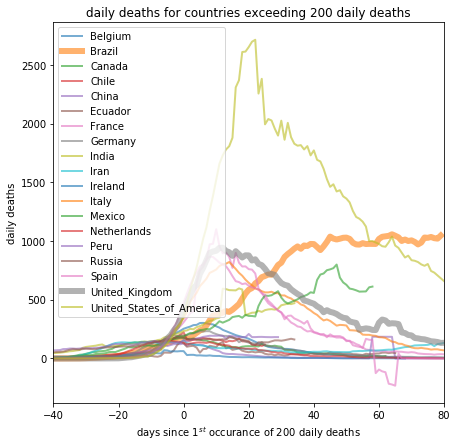

In [90]:
fig= plt.subplots(figsize=(7, 7))

daily_death_threshold = 200

for country in c.countriesAndTerritories.unique():
    c_country = c.loc[c['countriesAndTerritories'] == country]
    c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
    loc = np.where(c_country.deaths.values > daily_death_threshold)[0]
    if len(loc > 0):
        days = (c_country.date - c_country.iloc[loc[-1]].date).dt.days
        my_lw=2
        if country == 'United_Kingdom':
            my_lw=6
        if country == 'Brazil':
            my_lw=6
        plt.plot(days,c_country.deaths.rolling(window=7).mean(),label=country,lw=my_lw,alpha=0.6)

plt.legend(loc=2)
plt.title('daily deaths for countries exceeding '+str(daily_death_threshold)+' daily deaths')
plt.xlabel('days since 1$^{st}$ occurance of '+str(daily_death_threshold)+' daily deaths')
plt.ylabel('daily deaths')
plt.xlim([-40,80])

AttributeError: 'DataFrame' object has no attribute 'popData2018'

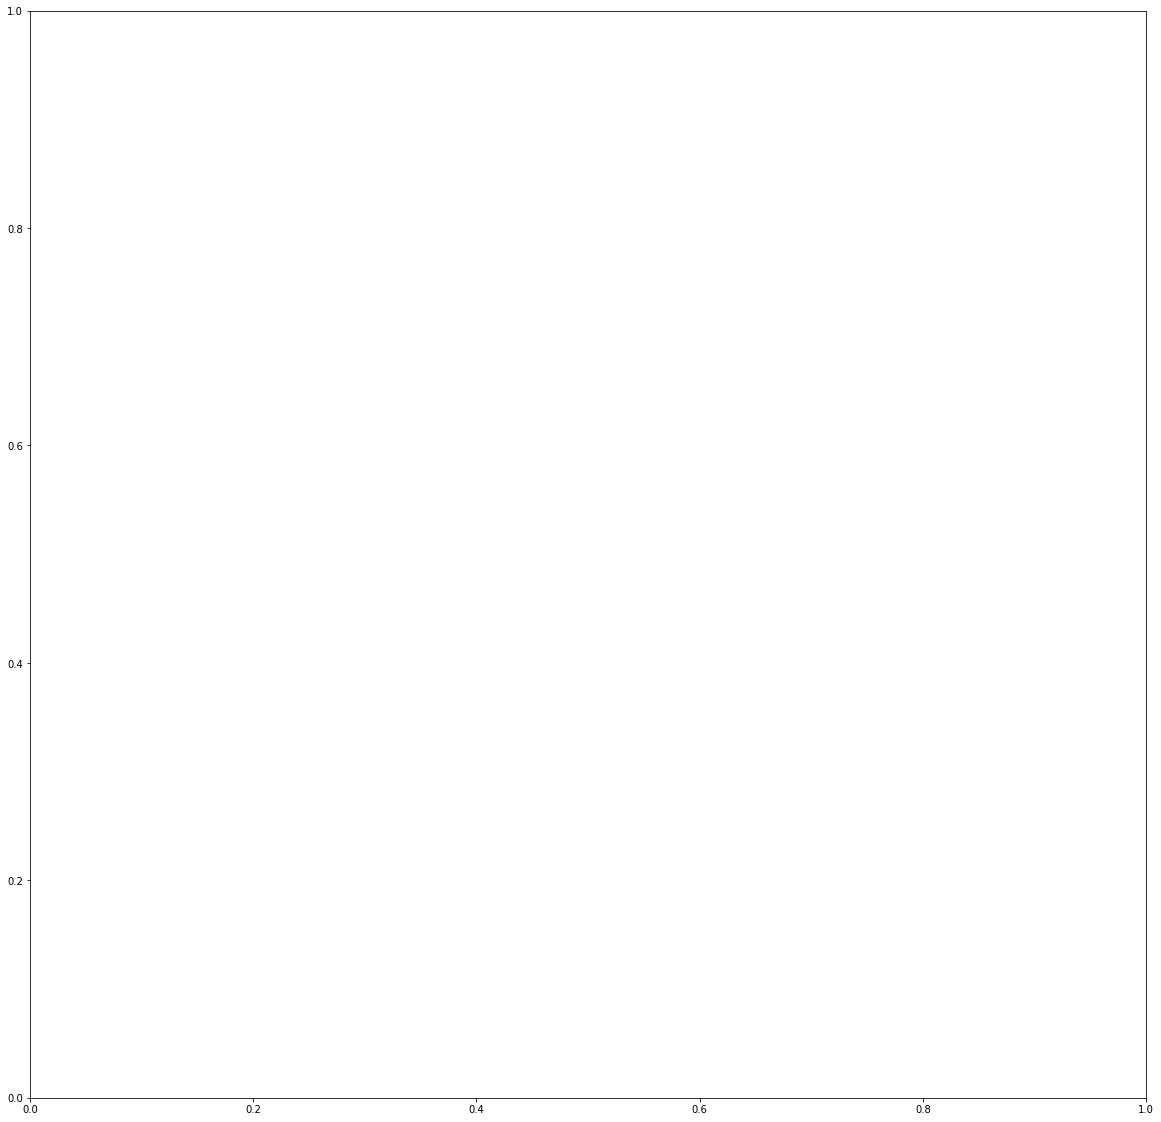

In [91]:
fig= plt.subplots(figsize=(20, 20))

daily_death_threshold_fract_of_pop = 0.00001

for country in c.countriesAndTerritories.unique():
    c_country = c.loc[c['countriesAndTerritories'] == country]
    if c_country.popData2018.values[0] > 1.0e6:
        c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
        loc = np.where(c_country.deaths.values > (daily_death_threshold_fract_of_pop * c_country.popData2018.values[0]))[0]
        if len(loc > 0):
            days = (c_country.date - c_country.iloc[loc[-1]].date).dt.days
            my_lw=2
#             if country == 'United_Kingdom':
#                 my_lw=6
            if country == 'Germany':
                my_lw=6
            plt.plot(days,c_country.deaths.rolling(window=7).mean()/(c_country.popData2018.values[0]/100.0),label=country,lw=my_lw,alpha=0.6)

plt.legend(loc=2)
plt.title('daily deaths for countries exceeding threshold daily deaths (min counyry pop > 1e6)')
plt.xlabel('days since 1$^{st}$ occurance of '+str(daily_death_threshold_fract_of_pop*100)+' % of pop daily deaths')
plt.ylabel('daily deaths per 100 of population')
plt.xlim([-40,80])

In [ ]:
fig= plt.subplots(figsize=(20, 20))

daily_death_threshold_fract_of_pop = 0.000005

for country in c.countriesAndTerritories.unique():
    c_country = c.loc[c['countriesAndTerritories'] == country]
    if c_country.popData2018.values[0] > 1.0e6:
        c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
        loc = np.where(c_country.deaths.values > (daily_death_threshold_fract_of_pop * c_country.popData2018.values[0]))[0]
        if len(loc > 0):
#             
            my_lw=2
            if country == 'United_Kingdom':
                my_lw=6
            if country == 'United_States_of_America':
                my_lw=6
            if country == 'Sweden':
                my_lw=6
            tmp = c_country.deaths.rolling(window=14).mean()/c_country.deaths.rolling(window=14).mean().max()
            loc = np.where(c_country.deaths.rolling(window=7).mean() == np.max(c_country.deaths.rolling(window=7).mean().max()))[0]
            days = (c_country.date - c_country.iloc[loc[-1]].date).dt.days
            plt.plot(days,tmp,label=country,lw=my_lw,alpha=0.6)

plt.legend(loc=2)
plt.title('normalised daily deaths for countries exceeding threshold daily deaths (min counyry pop > 1e6)')
plt.xlabel('days since 1$^{st}$ occurance of '+str(daily_death_threshold_fract_of_pop*100)+' % of pop daily deaths')
plt.ylabel('normalised daily deaths')
plt.xlim([-40,80])

In [ ]:
uk_measures={}
uk_measures['Heathrow begins screening all arrivals from Wuhan'] = datetime.datetime(2020, 1, 22)
uk_measures['doctors given powers to forcibly quarantine people'] = datetime.datetime(2020,2 , 10)
uk_measures['Boris Johnson urges everybody in the UK to work from home and avoid pubs and restaurants'] = datetime.datetime(2020, 3, 16)
uk_measures['announces most schools across England will be shut down in 2 days'] = datetime.datetime(2020, 3, 18)
uk_measures['Johnson orders all pubs, restaurants, gyms and other social venues across the country to close'] = datetime.datetime(2020, 3, 20)
uk_measures['Lockdown partial lift, unlimited exercise, back to work if cant work from home, travel for exercise'] = datetime.datetime(2020, 5, 10)

infection_to_death=20

country = 'United_Kingdom'

# country = 'United_States_of_America'
# country = 'Finland'

from scipy.optimize import curve_fit
from itertools import cycle

colours = ['r','g','b','c','m','y']
colours_cycle = cycle(colours)

def func(x, a, c, d):
    return a*np.exp(c*x)+d


c_country = c.loc[c['countriesAndTerritories'] == country]
c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
days = (c_country.date - c_country.iloc[0].date).dt.days

fig= plt.subplots(figsize=(10, 10))

x,y=days.copy(),c_country.deaths.values.copy()
plt.scatter(x,y)

# for i in (np.arange(15)+1):
#     x,y=days[i::].copy(),c_country.deaths.values[i::].copy()
#     popt, pcov = curve_fit(func, x, y)
#     plt.plot(x, func(x, *popt),alpha=0.8,label='_nolegend_')

if country == 'United_Kingdom':
    for key in uk_measures:
        color=next(colours_cycle)
        date = uk_measures[key]
        days = (date - c_country.iloc[0].date).days
        days2 = days + infection_to_death
        plt.plot([days,days],[0,1200],color,label=key,alpha=0.5,lw=5)
        plt.plot([days2,days2],[0,1200],color,alpha=0.2,lw=5)
    
plt.legend(loc = 1)

plt.savefig('/Users/ph290/Downloads/x_deaths.png')
# plt.xlim([-35,5])

In [ ]:
ISO3_codes = np.array([str(x) for x in np.unique(c.countryterritoryCode)])
ISO3_codes = ISO3_codes[ISO3_codes <> 'nan']

In [ ]:
ISO3_codes

In [ ]:
import iris
file = './data/download_jan.nc'
variable = '2 metre temperature' # 10 metre wind speed # surface_downwelling_shortwave_flux_in_air
# variable = '10 metre wind speed' 
cube = iris.load_cube(file,variable)

In [ ]:
import geopandas as gpd
# import geopandas

# country_df = gpd.read_file("./data/TM_WORLD_BORDERS-0.3.shp", vfs="zip://TM_WORLD_BORDERS-0.3.zip/")
country_df = gpd.read_file("./data/TM_WORLD_BORDERS-0.3.shp")


def get_country_window(country):
    return country_df[country_df["ISO3"].str.lower() == country.lower()].geometry.values[0].bounds


fig= plt.subplots(figsize=(10, 10))


for ISO3_code in ISO3_codes:
    try:

        country_window = get_country_window(ISO3_code)
        if country_window[0] < 0.0:
            country_lon = country_window[0] + (country_window[2]-country_window[0])/2
        else:
            country_lon = country_window[0] - (country_window[2]-country_window[0])/2

        if country_window[1] < 0.0:
            country_lat = country_window[1] + (country_window[3]-country_window[1])/2
        else:
            country_lat = country_window[1] - (country_window[3]-country_window[1])/2


        c_country = c.loc[c['countryterritoryCode'] == ISO3_code]
        c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
        #         days = (c_country.date - c_country.iloc[0].date).dt.days

        sample_points = [('longitude', np.array([country_lon])),('latitude', np.array([country_lat]))]
        result = cube.interpolate(sample_points, iris.analysis.Linear())


#         loc = np.where(c_country.deaths.values > 10)[0][-1]
#         print c_country.deaths.values[loc-14:loc]
#         x,y=days[loc-7:loc].copy(),c_country.deaths.values[loc-7:loc].copy()
#         popt, pcov = curve_fit(func, x, y)
#         plt.scatter(result.data[0][0][0],popt[1],alpha=0.5,label=ISO2_code)
        loc1 = np.where(c_country.deaths.values > 100)[0][-1]
        loc2 = np.where(c_country.deaths.values > 200)[0][-1]
        no_days_a_to_b = (c_country.iloc[loc2].date - c_country.iloc[loc1].date).days
        plt.scatter(result.data[0][0][0],no_days_a_to_b,alpha=0.5,label=ISO3_code)

    except:
        pass

plt.legend()
# plt.ylim([0,10])


# UK deaths by date of death
Note - these are deaths in hospital of people who tested positive for covid - not that covid was the cause of death.
This may be why numbers plateau at low values, because they were deaths taht woul dhave happened anyway, and they just happned to have covid but would not have died from that?

In [2]:
import pandas as pd
import datetime
from datetime import date


In [3]:
uk_measures={}
uk_measures['Heathrow begins screening all arrivals from Wuhan'] = datetime.datetime(2020, 1, 22)
uk_measures['doctors given powers to forcibly quarantine people'] = datetime.datetime(2020,2 , 10)
uk_measures['Boris Johnson urges everybody in the UK to work from home and avoid pubs and restaurants'] = datetime.datetime(2020, 3, 16)
uk_measures['announces most schools across England will be shut down in 2 days'] = datetime.datetime(2020, 3, 18)
uk_measures['Johnson orders all pubs, restaurants, gyms and other social venues across the country to close'] = datetime.datetime(2020, 3, 20)
uk_measures['Easter weekend'] = datetime.datetime(2020, 4, 12)
uk_measures['Lockdown partial lift, unlimited exercise, back to work if cant work from home, travel for exercise'] = datetime.datetime(2020, 5, 10)
uk_measures['Meet one person in public space'] = datetime.datetime(2020, 5, 13)
uk_measures['Schools back. Meet outdoors groups of 6'] = datetime.datetime(2020, 6, 1)


In [4]:
# https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-daily-deaths/
# https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/05/COVID-19-total-announced-deaths-26-May-2020.xlsx
try:
    analysis_day = date.today()
    url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
    df = pd.read_excel(url, sheetname='Tab4 Deaths by trust', header=15)
except:
    try:
        analysis_day = date.today()- datetime.timedelta(days=1)
        url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
        df = pd.read_excel(url, sheetname='Tab4 Deaths by trust', header=15)
    except:
        try:
            analysis_day = date.today()- datetime.timedelta(days=2)
            url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
            df = pd.read_excel(url, sheetname='Tab4 Deaths by trust', header=15)
        except:
            analysis_day = date.today()- datetime.timedelta(days=3)
            url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day-1)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
            df = pd.read_excel(url, sheetname='Tab4 Deaths by trust', header=15)

df = df.iloc[2::]

print 'Regions:'
print df['NHS England Region'].unique()

Regions:
[u'East Of England' u'London' u'Midlands' u'North East and Yorkshire'
 u'North West' u'South East' u'South West']


/Users/ph290/miniconda2/lib/python2.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [5]:
population={}
population['East Of England'] = 6.2e6
population['London'] = 8.9e6
population['Midlands'] = 5.9e6 +4.8e6
population['North East And Yorkshire'] = 2.66e6 +5.48e6
population['North West'] = 7.29e6
population['South East'] = 9.13e6
population['South West'] = 5.56e6


In [6]:
total = 0.0
for key in list(population):
    total += population[key]

print total

55920000.0


In [7]:
first_date = datetime.datetime(2020, 3, 1, 0, 0)
last_date = analysis_day

out_dates = []
out_deaths = []

dates = pd.date_range(start=first_date,end=last_date)
dates = pd.date_range(start=first_date,end=last_date)
for i,date in enumerate(dates):
    try:
        out_deaths.append(df[dates[i]].sum())
        out_dates.append(date)
    except:
        pass


region = 'London' # specify NHS region
# region = 'South West' # specify NHS region

df_tmp = df.loc[df['NHS England Region'] == region]
out_dates_region = []
out_deaths_region = []

dates = pd.date_range(start=first_date,end=last_date)
dates = pd.date_range(start=first_date,end=last_date)
for i,date in enumerate(dates):
    try:
        out_deaths_region.append(df_tmp[dates[i]].sum())
        out_dates_region.append(date)
    except:
        pass

out_deaths_region_tot=out_deaths_region
out_deaths_region = np.array(out_deaths_region)
out_deaths_region /= population[region]
#     
region2 = 'South West' # specify NHS region
# region2 = 'Midlands' # specify NHS region
# region2 = 'East Of England'
# region2 = 'North East And Yorkshire'
# region2 = 'North West'
# region2 = 'South East'

df_tmp = df.loc[df['NHS England Region'] == region2]
out_dates_region2 = []
out_deaths_region2 = []


for i,date in enumerate(dates):
    try:
        out_deaths_region2.append(df_tmp[dates[i]].sum())
        out_dates_region2.append(date)
    except:
        pass

out_deaths_region2_tot = out_deaths_region2
out_deaths_region2 = np.array(out_deaths_region2)
out_deaths_region2 /= population[region2]

# region3 = 'South West' # specify NHS region
# region3 = 'Midlands' # specify NHS region
region3 = 'East Of England'
# region3 = 'North East And Yorkshire'
# region3 = 'North West'
# region3 = 'South East'

df_tmp = df.loc[df['NHS England Region'] == region3]
out_dates_region3 = []
out_deaths_region3 = []

for i,date in enumerate(dates):
    try:
        out_deaths_region3.append(df_tmp[dates[i]].sum())
        out_dates_region3.append(date)
    except:
        pass

out_deaths_region3_tot = out_deaths_region3
out_deaths_region3 = np.array(out_deaths_region3)
out_deaths_region3 /= population[region3]


(0, 600)

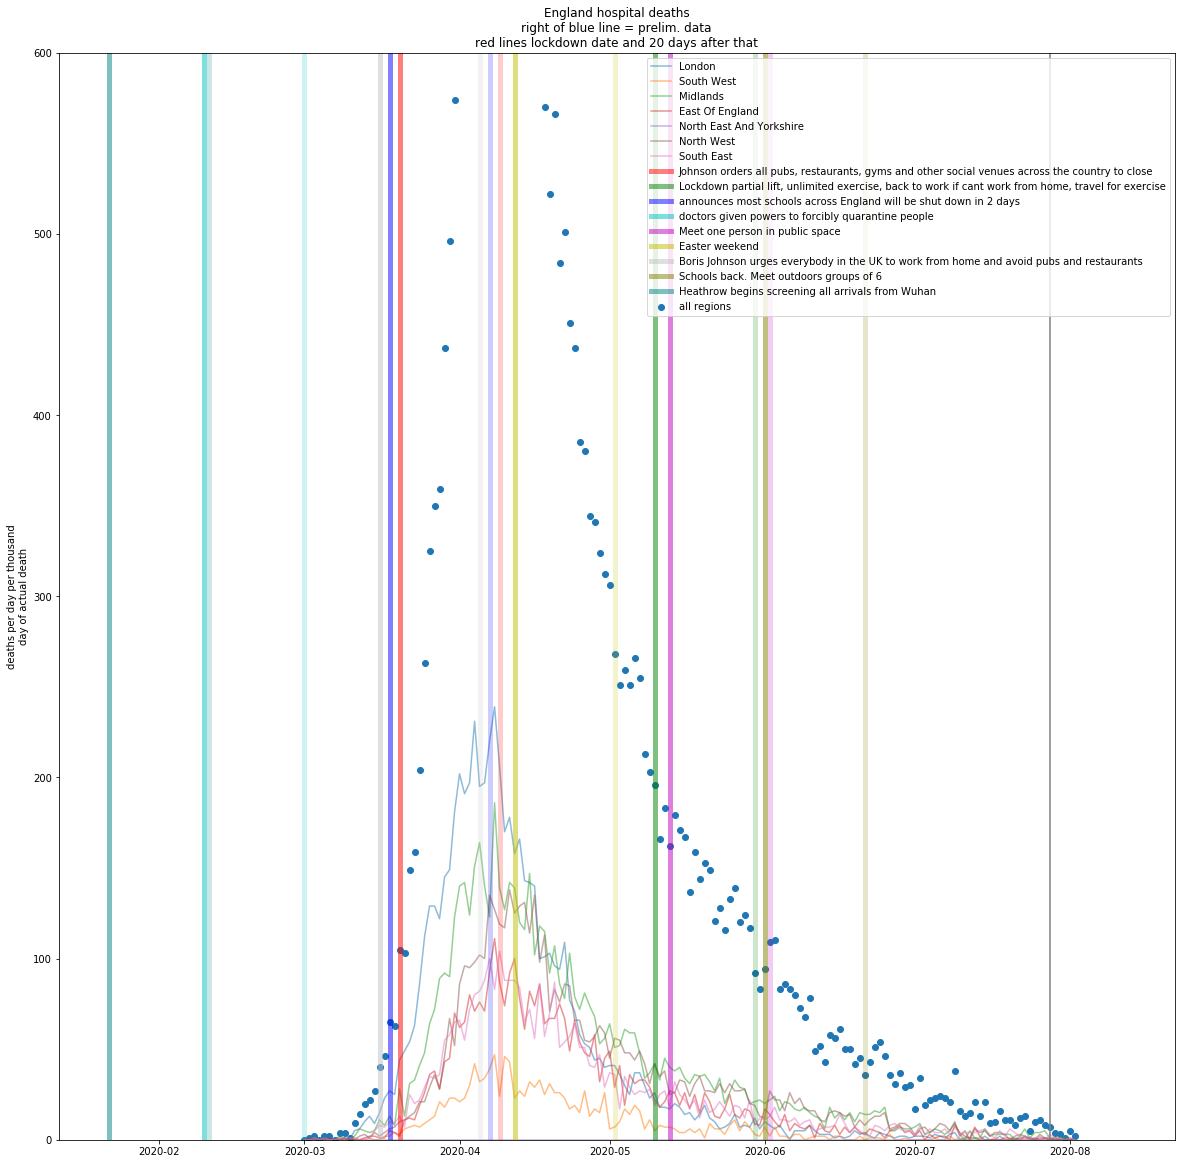

In [8]:
def plot_region(region,df,dates):
    df_tmp = df.loc[df['NHS England Region'] == region]
    out_dates_region = []
    out_deaths_region = []
    for i,date in enumerate(dates):
        try:
            out_deaths_region.append(df_tmp[dates[i]].sum())
            out_dates_region.append(date)
        except:
            pass
#     plt.scatter(out_dates_region,out_deaths_region,label= region,alpha=0.5,s=10)
    plt.plot(out_dates_region,out_deaths_region,label= region,alpha=0.5)
    
max_no = 600

fig= plt.subplots(figsize=(20, 20))
plt.scatter(out_dates,out_deaths,label='all regions')
 


regions = ['London','South West','Midlands','East Of England','North East And Yorkshire','North West','South East']
for region in regions:
    plot_region(region,df,dates)

x_still_coming_in = out_dates[-1]- datetime.timedelta(days=5)
plt.plot([x_still_coming_in,x_still_coming_in],[0,max_no])

# for tmp in list(uk_measures):
#     measure = uk_measures[tmp]
#     plt.plot([measure,measure],[0,max_no],'r')
#     plt.plot([measure + datetime.timedelta(days=20),measure + datetime.timedelta(days=20)],[0,max_no],'r',alpha=0.6)
from scipy.optimize import curve_fit
from itertools import cycle

colours = ['r','g','b','c','m','y','#C0C0C0','#808000','#008080']
colours_cycle = cycle(colours)

infection_to_death=20
for key in uk_measures:
    color=next(colours_cycle)
    days = uk_measures[key]
    days2 = days + datetime.timedelta(infection_to_death)
    plt.plot([days,days],[0,max_no],color,label=key,alpha=0.5,lw=5)
    plt.plot([days2,days2],[0,max_no],color,alpha=0.2,lw=5)



plt.legend(loc=1)
plt.ylabel('deaths per day per thousand\nday of actual death')
plt.title('England hospital deaths\nright of blue line = prelim. data\nred lines lockdown date and 20 days after that')

plt.ylim([0,max_no])
# plt.savefig('/Users/ph290/Downloads/deaths_by_actual_date_tot.png')

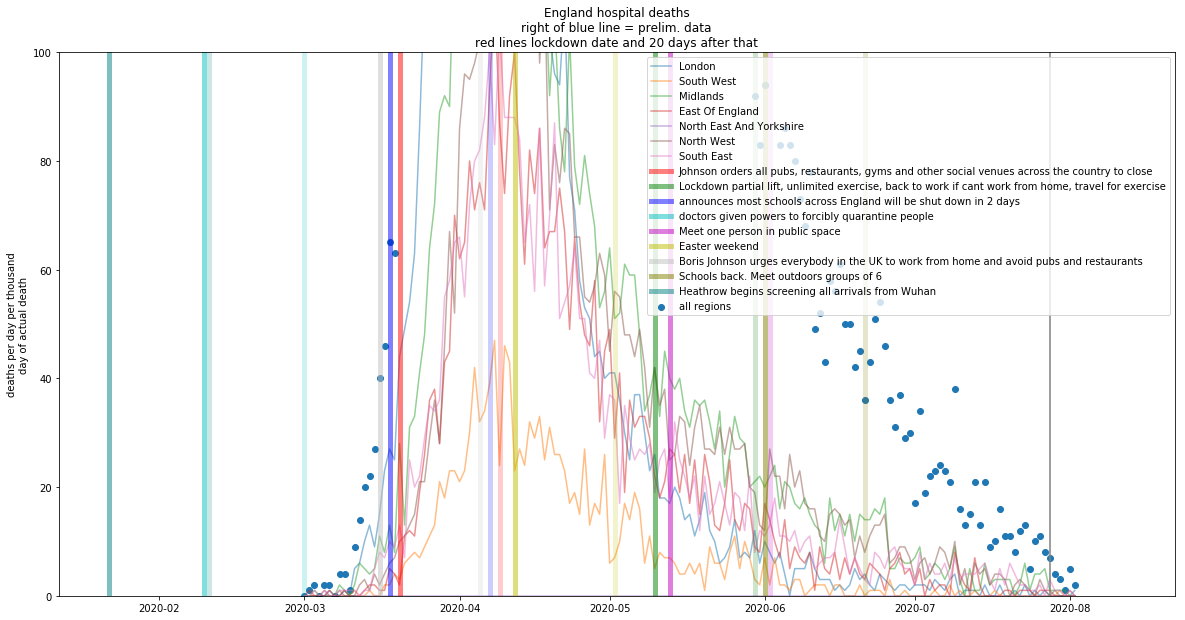

In [9]:
def plot_region(region,df,dates):
    df_tmp = df.loc[df['NHS England Region'] == region]
    out_dates_region = []
    out_deaths_region = []
    for i,date in enumerate(dates):
        try:
            out_deaths_region.append(df_tmp[dates[i]].sum())
            out_dates_region.append(date)
        except:
            pass
#     plt.scatter(out_dates_region,out_deaths_region,label= region,alpha=0.5,s=10)
    plt.plot(out_dates_region,out_deaths_region,label= region,alpha=0.5)
    
max_no = 100

fig= plt.subplots(figsize=(20, 10))
plt.scatter(out_dates,out_deaths,label='all regions')
 


regions = ['London','South West','Midlands','East Of England','North East And Yorkshire','North West','South East']
for region in regions:
    plot_region(region,df,dates)

x_still_coming_in = out_dates[-1]- datetime.timedelta(days=5)
plt.plot([x_still_coming_in,x_still_coming_in],[0,max_no])

# for tmp in list(uk_measures):
#     measure = uk_measures[tmp]
#     plt.plot([measure,measure],[0,max_no],'r')
#     plt.plot([measure + datetime.timedelta(days=20),measure + datetime.timedelta(days=20)],[0,max_no],alpha=0.6)
from scipy.optimize import curve_fit
from itertools import cycle


infection_to_death=20
for key in uk_measures:
    color=next(colours_cycle)
    days = uk_measures[key]
    days2 = days + datetime.timedelta(infection_to_death)
    plt.plot([days,days],[0,max_no],color,label=key,alpha=0.5,lw=5)
    plt.plot([days2,days2],[0,max_no],color,alpha=0.2,lw=5)


plt.legend()
plt.ylabel('deaths per day per thousand\nday of actual death')
plt.title('England hospital deaths\nright of blue line = prelim. data\nred lines lockdown date and 20 days after that')

plt.ylim([0,max_no])
plt.savefig('/Users/ph290/Downloads/deaths_by_actual_date_tot.png')

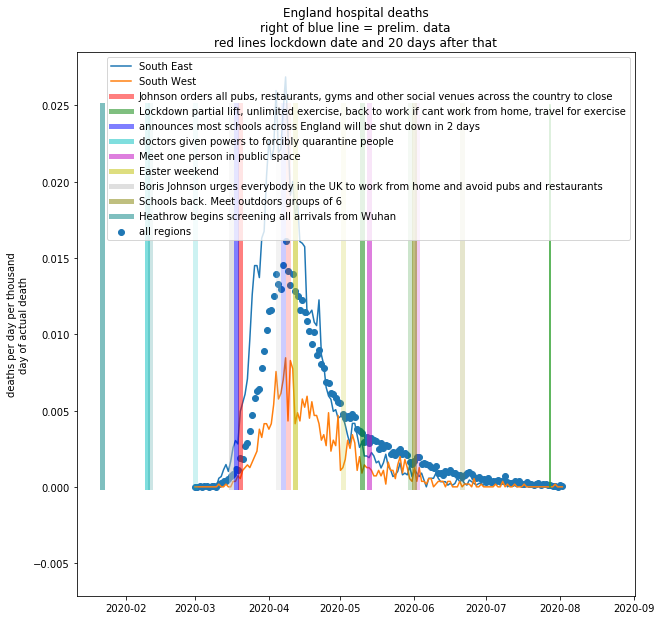

In [10]:
max_no = 0.025

fig= plt.subplots(figsize=(10, 10))
plt.scatter(out_dates,(np.array(out_deaths)/total)*1000.0,label='all regions')

plt.plot(out_dates_region,out_deaths_region*1000.0,label= region)
plt.plot(out_dates_region2,out_deaths_region2*1000.0,label= region2)

x_still_coming_in = out_dates[-1]- datetime.timedelta(days=5)
plt.plot([x_still_coming_in,x_still_coming_in],[0,max_no])

infection_to_death=20
for key in uk_measures:
    color=next(colours_cycle)
    days = uk_measures[key]
    days2 = days + datetime.timedelta(infection_to_death)
    plt.plot([days,days],[0,max_no],color,label=key,alpha=0.5,lw=5)
    plt.plot([days2,days2],[0,max_no],color,alpha=0.2,lw=5)

plt.legend()
plt.ylabel('deaths per day per thousand\nday of actual death')
plt.title('England hospital deaths\nright of blue line = prelim. data\nred lines lockdown date and 20 days after that')

plt.savefig('/Users/ph290/Downloads/deaths_by_actual_date.png')

In [11]:
try:
    analysis_day = date.today()
    url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
    df_age = pd.read_excel(url, sheetname='Tab3 Deaths by age', header=15)
except:
    try:
        analysis_day = date.today()- datetime.timedelta(days=1)
        url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
        df_age = pd.read_excel(url, sheetname='Tab3 Deaths by age', header=15)
    except:
        try:
            analysis_day = date.today()- datetime.timedelta(days=2)
            url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
            df_age = pd.read_excel(url, sheetname='Tab3 Deaths by age', header=15)
        except:
            analysis_day = date.today()- datetime.timedelta(days=3)
            url="https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"+analysis_day.strftime('%m')+"/COVID-19-total-announced-deaths-"+str(analysis_day.day-1)+"-"+analysis_day.strftime('%B')+"-2020.xlsx"
            df_age = pd.read_excel(url, sheetname='Tab3 Deaths by age', header=15)

df_age = df_age.iloc[2::].T
df_age.columns = df_age.iloc[0]
df_age = df_age.iloc[3:-4]

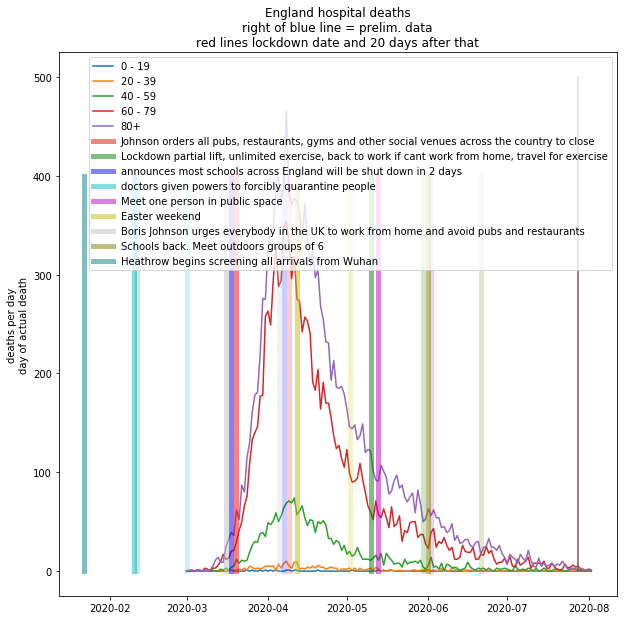

In [12]:
fig= plt.subplots(figsize=(10, 10))

for col_name in list(df_age.iloc[:,0:5]):
    plt.plot(df_age.index,df_age[col_name],label=col_name)

x_still_coming_in = out_dates[-1]- datetime.timedelta(days=5)
plt.plot([x_still_coming_in,x_still_coming_in],[0,500])

max_no=400
infection_to_death=20
for key in uk_measures:
    color=next(colours_cycle)
    days = uk_measures[key]
    days2 = days + datetime.timedelta(infection_to_death)
    plt.plot([days,days],[0,max_no],color,label=key,alpha=0.5,lw=5)
    plt.plot([days2,days2],[0,max_no],color,alpha=0.2,lw=5)

plt.legend()
plt.ylabel('deaths per day\nday of actual death')
plt.title('England hospital deaths\nright of blue line = prelim. data\nred lines lockdown date and 20 days after that')

plt.legend()
plt.savefig('/Users/ph290/Downloads/deaths_by_actual_date_by_date.png')

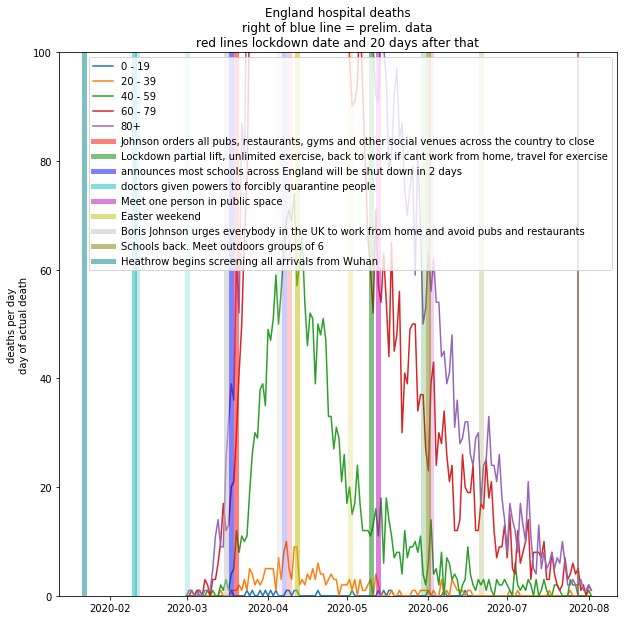

In [13]:
fig= plt.subplots(figsize=(10, 10))

for col_name in list(df_age.iloc[:,0:5]):
    plt.plot(df_age.index,df_age[col_name],label=col_name)

x_still_coming_in = out_dates[-1]- datetime.timedelta(days=5)
plt.plot([x_still_coming_in,x_still_coming_in],[0,500])

max_no=100
infection_to_death=20
for key in uk_measures:
    color=next(colours_cycle)
    days = uk_measures[key]
    days2 = days + datetime.timedelta(infection_to_death)
    plt.plot([days,days],[0,max_no],color,label=key,alpha=0.5,lw=5)
    plt.plot([days2,days2],[0,max_no],color,alpha=0.2,lw=5)

plt.ylim([0,100])

plt.legend()
plt.ylabel('deaths per day\nday of actual death')
plt.title('England hospital deaths\nright of blue line = prelim. data\nred lines lockdown date and 20 days after that')

plt.legend()
plt.savefig('/Users/ph290/Downloads/deaths_by_actual_date_by_date.png')

(0, 150)

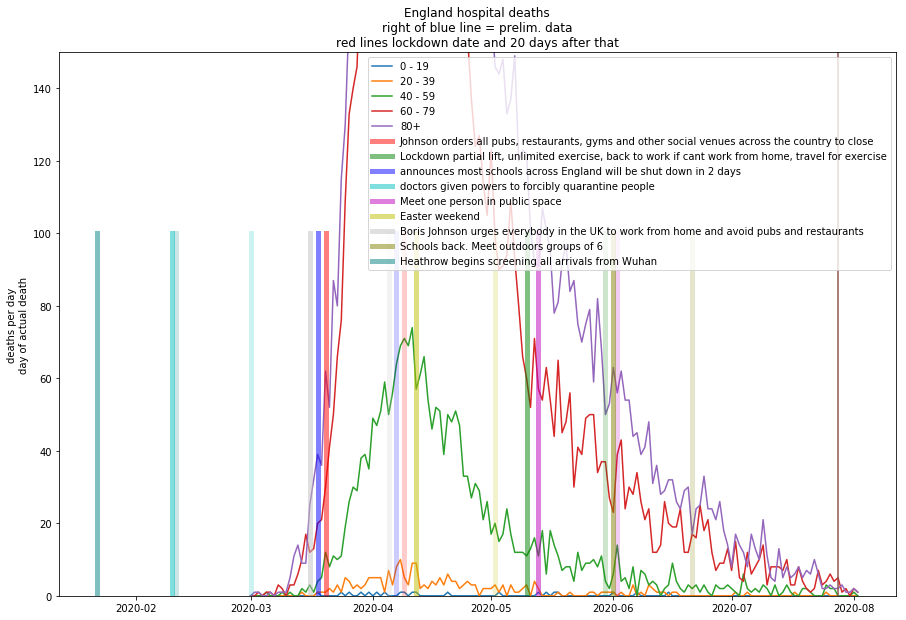

In [14]:
fig= plt.subplots(figsize=(15, 10))

for col_name in list(df_age.iloc[:,0:5]):
    plt.plot(df_age.index,df_age[col_name],label=col_name)

x_still_coming_in = out_dates[-1]- datetime.timedelta(days=5)
plt.plot([x_still_coming_in,x_still_coming_in],[0,500])

max_no=100
infection_to_death=20
for key in uk_measures:
    color=next(colours_cycle)
    days = uk_measures[key]
    days2 = days + datetime.timedelta(infection_to_death)
    plt.plot([days,days],[0,max_no],color,label=key,alpha=0.5,lw=5)
    plt.plot([days2,days2],[0,max_no],color,alpha=0.2,lw=5)


plt.legend()
plt.ylabel('deaths per day\nday of actual death')
plt.title('England hospital deaths\nright of blue line = prelim. data\nred lines lockdown date and 20 days after that')

plt.legend()

plt.ylim([0,150])

In [15]:
# UK (not england) age

In [16]:
df3 = pd.read_csv('/Users/ph290/Downloads/United Kingdom-2020.csv')

IOError: File /Users/ph290/Downloads/United Kingdom-2020.csv does not exist

In [17]:
df3['total']= df3.M + df3.F
ages = ['0-19','20-39','40-59','60-79','80+']
tot_pop = [df3['total'].iloc[i*4:(i*4)+4].sum() for i in np.arange(5)]
tot_pop[-1] += df3['total'].iloc[-1]
tot_pop_fract = ((np.array(tot_pop)*1.0)/np.sum(tot_pop))

NameError: name 'df3' is not defined

In [18]:
plt.scatter(ages,tot_pop_fract)

NameError: name 'ages' is not defined

NameError: name 'tot_pop' is not defined

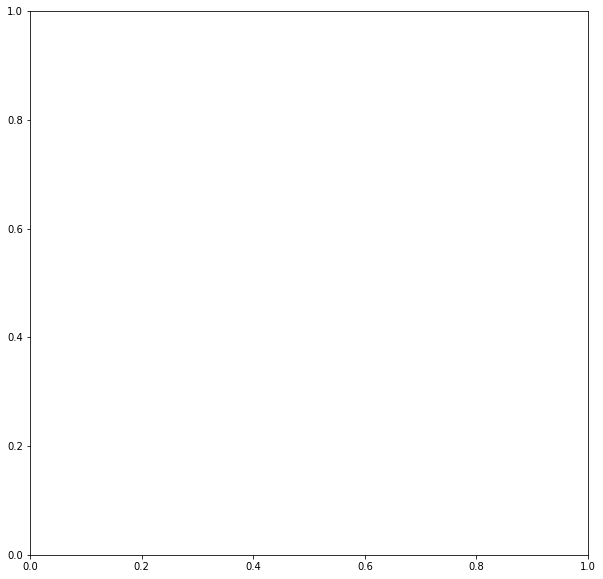

In [19]:
fig= plt.subplots(figsize=(10, 10))

for i,col_name in enumerate(list(df_age.iloc[:,0:5])):
    plt.scatter(df_age.index,df_age[col_name]/tot_pop[i],label=col_name)

x_still_coming_in = out_dates[-1]- datetime.timedelta(days=5)
plt.plot([x_still_coming_in,x_still_coming_in],[0,0.00015])

max_no=100
infection_to_death=20
for key in uk_measures:
    color=next(colours_cycle)
    days = uk_measures[key]
    days2 = days + datetime.timedelta(infection_to_death)
    plt.plot([days,days],[0,max_no],color,label=key,alpha=0.5,lw=5)
    plt.plot([days2,days2],[0,max_no],color,alpha=0.2,lw=5)

plt.ylim([0.0,0.00015])
plt.legend()
plt.ylabel('Fractino of that age group\ndeaths per day\nday of actual death')
plt.title('England hospital deaths\nright of blue line = prelim. data\nred lines lockdown date and 20 days after that')

plt.legend()
plt.savefig('/Users/ph290/Downloads/deaths_by_actual_date_by_date_fract_of_pop.png')

In [20]:
plt.scatter([9.9,29.5,49.5,69.5,85.0],[df_age[name].sum()/tot_pop[i] for i,name in enumerate(list(df_age.iloc[:,0:5]))])
plt.ylim(0.0,0.004)

NameError: name 'tot_pop' is not defined

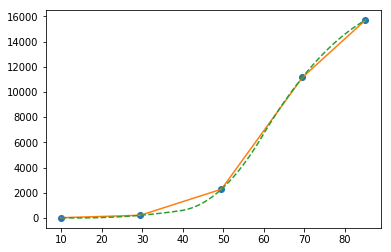

In [21]:
from scipy.interpolate import interp1d

x = [9.9,29.5,49.5,69.5,85.0]
y=[df_age[name].sum() for i,name in enumerate(list(df_age.iloc[:,0:5]))]

f = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')

xnew = np.linspace(np.min(x), np.max(x), num=100)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')


(0, 2050)

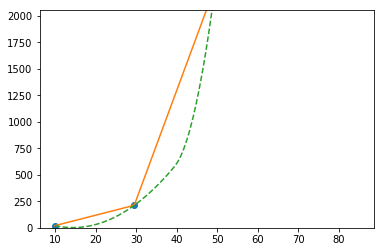

In [22]:
xnew = np.linspace(np.min(x), np.max(x), num=100)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.ylim(0,2050)

(0, 205)

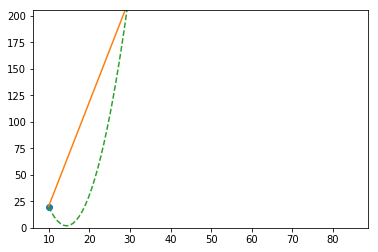

In [23]:
xnew = np.linspace(np.min(x), np.max(x), num=100)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.ylim(0,205)